## Tratamiento de las variables categóricas

In [149]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [150]:
df = pd.read_csv('../datasets/ecom-expense/Ecom Expense.csv')

In [151]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [152]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

### Añadir variables dummy al dataset

In [153]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [154]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


### Creación del modelo

In [155]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [156]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [157]:
lm = LinearRegression().fit(X,Y)

In [158]:
lm.intercept_, lm.coef_

(-79.41713030136634,
 array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
         7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02]))

In [159]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205724),
 ('Transaction Time', 0.15494612549589348),
 ('Gender_Female', -131.0250132555455),
 ('Gender_Male', 131.02501325554587),
 ('City_Tier 1', 76.76432601049547),
 ('City_Tier 2', 55.138974309232296),
 ('City_Tier 3', -131.90330031972775),
 ('Record', 772.2334457445639)]

In [160]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:  
Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Gender_Female'* -131.02501325554567 + 'Gender_Male'* 131.0250132555456+'City_Tier 1'* 76.76432601049527 + 'City_Tier 2'* 55.138974309232474 + 'City_Tier 3'* -131.9033003197278+'Record'* 772.2334457445648
    

In [161]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589545+ df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1']* 76.76432601049527 +  df_new['City_Tier 2']* 55.138974309232474 + df_new['City_Tier 3']* (-131.9033003197278)+ df_new['Record']* 772.2334457445648

In [162]:
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [163]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
sales_mean=np.mean(df_new["Total Spend"])
error = (RSE/sales_mean)*100
error

13.03113568029416

El modelo se debería interpretar por variables categóricas:  
* Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 0.14753898049205738'Monthly Income' + 0.15494612549589545'Transaction Time' + 772.2334457445648'Record'

* Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 0.14753898049205738'Monthly Income' + 0.15494612549589545'Transaction Time' + 772.2334457445648'Record'

* Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 0.14753898049205738'Monthly Income' + 0.15494612549589545'Transaction Time' + 772.2334457445648'Record'  

* Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 0.14753898049205738'Monthly Income' + 0.15494612549589545'Transaction Time' - 131.0250132555456 + 76.76432601049527 + 772.2334457445648'Record'

* Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 0.14753898049205738'Monthly Income' + 0.15494612549589545'Transaction Time' - 131.0250132555456 + 55.138974309232474  + 772.2334457445648'Record'  

* Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 0.14753898049205738'Monthly Income' + 0.15494612549589545'Transaction Time' - 131.0250132555456 - 131.9033003197278 + 772.2334457445648'Record'

## Eliminar variables dummy redundantes

In [164]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [165]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [166]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


Se enmascaran las variables que no son necesarias, porque por ejemplo si hay un 0 en el género masculino, es que habría un 1 en el género femenino, igual para los city tier. Esto se puede hacer, porque cuando hay un 1 en una de las variables para el resto hay un 0.

In [167]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression().fit(X,Y)

In [168]:
lm.intercept_, list(zip(feature_cols, lm.coef_))

(-133.6778175464151,
 [('Monthly Income', 0.14753898049205724),
  ('Transaction Time', 0.15494612549589926),
  ('Gender_Male', 262.05002651109345),
  ('City_Tier 2', -21.625351701264158),
  ('City_Tier 3', -208.6676263302229),
  ('Record', 772.233445744563)])

In [169]:
lm.score(X,Y)

0.9179923586131016

El modelo no cambia, simplemente cambian los coeficientes porque tenemos menos variables, con lo cual la fórmula de la recta se simplificaría.

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)
 
 Coeficientes tras enmascarar las variables dummy pertinentes
* 'Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02, 
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female: 
    * antes -> -131.02,
    * después -> 0
* CT1: 
    * antes -> 76.76,
    * después -> 0
* CT2: 
    * antes -> 55.13, 
    * después -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * después -> -208.66 = (-131.90 - 76.76)

## Transformación de variables para conseguir una relación no lineal

In [170]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [171]:
data_auto["mpg"] = data_auto["mpg"].fillna(data_auto["mpg"].mean())
data_auto["horsepower"] = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())

In [172]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

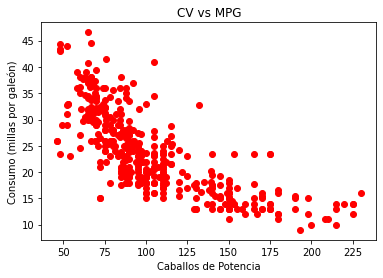

In [173]:
%matplotlib inline

plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

Viendo la gráfica lo más probable es que tenga una relación cuadrática o exponencial

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [174]:
X = data_auto["horsepower"]
Y = data_auto["mpg"]

In [175]:
lm = LinearRegression()
lm.fit(X,Y)

ValueError: Expected 2D array, got 1D array instead:
array=[130.     165.     150.     150.     140.     198.     220.     215.
 225.     190.     115.     165.     153.     175.     175.     170.
 160.     140.     150.     225.      95.      95.      97.      85.
  88.      46.      87.      90.      95.     113.      90.     215.
 200.     210.     193.      88.      90.      95.     105.0825  48.
 100.     105.     100.      88.     100.     165.     175.     153.
 150.     180.     170.     175.     110.      72.     100.      88.
  86.      90.      70.      76.      65.      69.      60.      70.
  95.      80.      54.      90.      86.     165.     175.     150.
 153.     150.     208.     155.     160.     190.      97.     150.
 130.     140.     150.     112.      76.      87.      69.      86.
  92.      97.      80.      88.     175.     150.     145.     137.
 150.     198.     150.     158.     150.     215.     225.     175.
 105.     100.     100.      88.      95.      46.     150.     167.
 170.     180.     100.      88.      72.      94.      90.      85.
 107.      90.     145.     230.      49.      75.      91.     112.
 150.     110.     122.     180.      95.     105.0825 100.     100.
  67.      80.      65.      75.     100.     110.     105.     140.
 150.     150.     140.     150.      83.      67.      78.      52.
  61.      75.      75.      75.      97.      93.      67.      95.
 105.      72.      72.     170.     145.     150.     148.     110.
 105.     110.      95.     110.     110.     129.      75.      83.
 100.      78.      96.      71.      97.      97.      70.      90.
  95.      88.      98.     115.      53.      86.      81.      92.
  79.      83.     140.     150.     120.     152.     100.     105.
  81.      90.      52.      60.      70.      53.     100.      78.
 110.      95.      71.      70.      75.      72.     102.     150.
  88.     108.     120.     180.     145.     130.     150.      68.
  80.      58.      96.      70.     145.     110.     145.     130.
 110.     105.     100.      98.     180.     170.     190.     149.
  78.      88.      75.      89.      63.      83.      67.      78.
  97.     110.     110.      48.      66.      52.      70.      60.
 110.     140.     139.     105.      95.      85.      88.     100.
  90.     105.      85.     110.     120.     145.     165.     139.
 140.      68.      95.      97.      75.      95.     105.      85.
  97.     103.     125.     115.     133.      71.      68.     115.
  85.      88.      90.     110.     130.     129.     138.     135.
 155.     142.     125.     150.      71.      65.      80.      80.
  77.     125.      71.      90.      70.      70.      65.      69.
  90.     115.     115.      90.      76.      60.      70.      65.
  90.      88.      90.      90.      78.      90.      75.      92.
  75.      65.     105.      65.      48.      48.      67.      67.
  67.     105.0825  67.      62.     132.     100.      88.     105.0825
  72.      84.      84.      92.     110.      84.      58.      64.
  60.      67.      65.      62.      68.      63.      65.      65.
  74.     105.0825  75.      75.     100.      74.      80.     110.
  76.     116.     120.     110.     105.      88.      85.      88.
  88.      88.      85.      84.      90.      92.     105.0825  74.
  68.      68.      63.      70.      88.      75.      70.      67.
  67.      67.     110.      85.      92.     112.      96.      84.
  90.      86.      52.      84.      79.      82.    ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

El tipo de dato no es correcto, para corregirlo se realiza una conversión de pandas.core.series.Series a numpy.ndarray

In [176]:
X = X[:, np.newaxis]

In [177]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

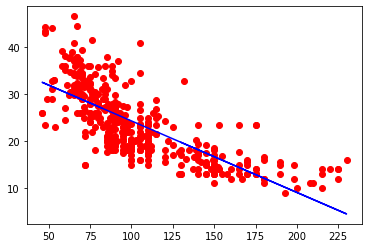

In [178]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [179]:
lm.score(X_data, Y)

0.5746533406450252

In [180]:
SSD = np.sum((Y - lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-1))
y_mean = np.mean(Y)
error = RSE/y_mean

SSD, RSE, y_mean, error*100

(10315.751960060918, 5.046879480825511, 23.514572864321607, 21.462773361633474)

### Modelo de regresión cuadrático
* mpg = a + b * horsepower^2 

In [181]:
X = data_auto["horsepower"]
Y = data_auto["mpg"]

In [182]:
X = X[:,np.newaxis]**2

In [183]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
lm.score(X, Y)

0.4849887034823205

In [185]:
SSD = np.sum((Y - lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-1))
y_mean = np.mean(Y)
error = RSE/y_mean

SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

### Modelo de regresión  lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [186]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [187]:
X = data_auto["horsepower"]
Y = data_auto["mpg"]

In [188]:
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X[:,np.newaxis])

In [189]:
lm = linear_model.LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
lm.score(X, Y)

0.6439066584257469

In [191]:
lm.intercept_, lm.coef_

(55.02619244708123, array([ 0.        , -0.43404318,  0.00112615]))

mpg = 55.026 -0.434 * hp + 0.00112615 * hp^2

Un polinomio de grado 2 da buenos resultado, pero puede que al aumentar el grado obtengamos mejores resultados

In [205]:
def poly_model(d, X, Y):
    poly = PolynomialFeatures(degree=d)
    X = poly.fit_transform(X)
    lm = linear_model.LinearRegression()
    lm.fit(X, Y)
    print("Regresión de grado ", d)
    print("R2:", lm.score(X, Y))
    print(lm.intercept_)
    print(lm.coef_)
    return lm

In [199]:
def poly_model_range(degree_min,degree_max, X, Y):
    for d in range(degree_min, degree_max+1):
        poly = PolynomialFeatures(degree=d)
        X = poly.fit_transform(X)
        lm = linear_model.LinearRegression()
        lm.fit(X, Y)
        print("Regresión de grado ", d)
        print("R2:", lm.score(X, Y))
        print(lm.intercept_)
        print(lm.coef_)
        print("*"*20)

In [206]:
X = data_auto["horsepower"]
Y = data_auto["mpg"]
poly_model_range(2,4,X[:,np.newaxis],Y)

Regresión de grado  2
R2: 0.6439066584257469
55.02619244708123
[ 0.         -0.43404318  0.00112615]
********************
Regresión de grado  3
R2: 0.6572904054083124
-157.02359485540399
[ 0.00000000e+00  3.33694485e-04  3.58731778e+00 -4.60277192e-02
  6.87136689e-11  3.58731805e+00 -4.60277161e-02 -4.60277161e-02
  8.01851802e-04 -4.43014187e-06  0.00000000e+00  3.58731805e+00
 -4.60277161e-02 -4.60277161e-02  8.01852067e-04 -4.47422327e-06
  8.01852067e-04 -4.47422327e-06  3.79762950e-08 -4.32538142e-11]
********************
Regresión de grado  4
R2: 0.2847911844808273
25.434933322012157
[-9.76672688e-45  2.05313551e-47 -5.61590338e-49 ... -6.31922520e-46
  7.82369240e-48 -9.09647214e-51]
********************
